## Importing Libraries and Loading Data

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Data
Kaggel: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

In [4]:
df = pd.read_csv('winequality-red.csv')

## Understanding Data/ EDA

Null values, high & low cardinality (catogotical features that either have too few or too many unique feature), leakage (any features that has similar information to the target columns), multicollinearity (few feature has corelation).

In [5]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [6]:
df.shape

(1599, 12)

Checking for Missing Values

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

checking info about the data and data types 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## General Statistical Analysis

In [15]:
df.describe().T

count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   14.00000  21.000000   72.00000  
total sulfur dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    8.00000

If there is a significant difference between the mean and the median values, there are some outliers in our data

- avarage alcohol in red wines is 10.40
- we see outliers using boxplot below

In [18]:
columns = df.columns

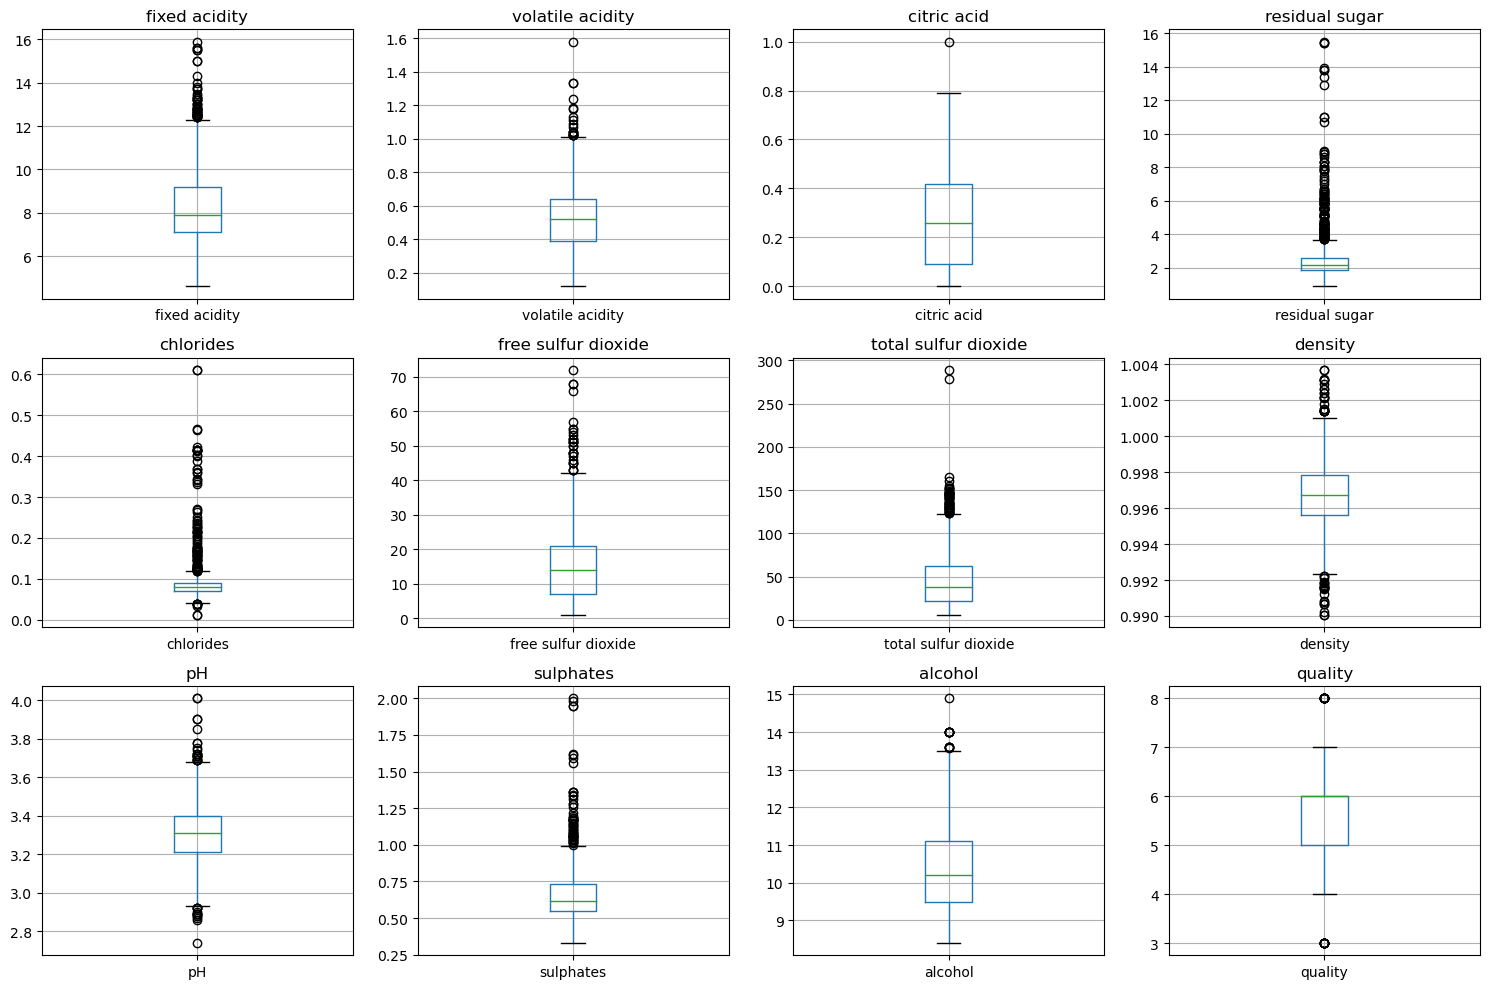

In [19]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns, 1):
    plt.subplot(3, 4, i)
    df.boxplot(column=column)
    plt.title(column)

plt.tight_layout()


In [22]:
df.corr().T

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

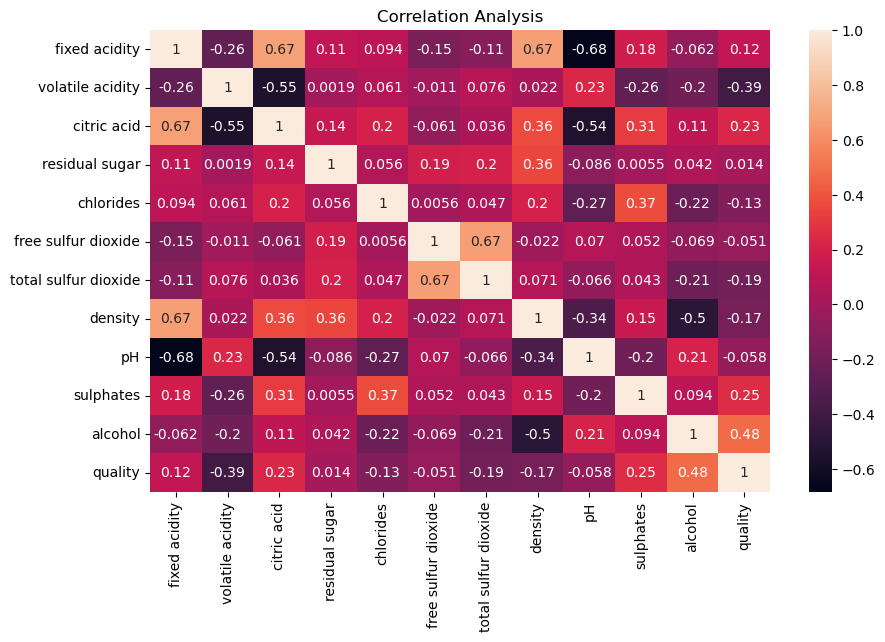

In [24]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title("Correlation Analysis")
sns.heatmap(data=df.corr(), annot=True)
plt.show()

In [20]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

Observations
- Target columns quality 3 & 8 has very low data points
- columns has outliers 
- ph is correlated with fixed acidity,citric acid is correlated with volatile acidity

## Split

In [25]:
# split into target variable (y) and feature matrix (X)
X = df.drop(['quality'], axis=1)
y = df['quality']

In [32]:
print('Shape of features (X):',X.shape)
print('Shape of labels (y):',y.shape)

Shape of features (X): (1599, 11)
Shape of labels (y): (1599,)


In [26]:
#Create the feature matrix named X_train, which you'll use to train model.feature matrix should always be two-dimensional.
# split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)y_mean = y_train.mean()

print("Mean score:", y_mean)
print('y_test:',y_test.shape)

X_train: (1279, 11)
y_train: (1279,)
X_test: (320, 11)
y_test: (320,)


#### Model Training
- Define
- Fit
- Predict
- Evaluate

##  1. Decision Tree Model

In [45]:
# Create decision tree
Decision_tree = DecisionTreeClassifier()

# Train the model on the training set
Decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
# Make predictions on the testing set
y_pred = Decision_tree.predict(X_test)

In [47]:
prediction_df = pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference / Residual':y_test-y_pred})
prediction_df

Actual Value  Predicted Value  Difference / Residual
1109             6                6                      0
1032             5                5                      0
1002             7                7                      0
487              6                5                      1
979              5                5                      0
...            ...              ...                    ...
794              6                6                      0
813              4                4                      0
1322             5                7                     -2
704              4                3                      1
1023             6                6                      0

[320 rows x 3 columns]

In [49]:
print('Model accuracy score:{0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score:0.6594


In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.22      0.18      0.20        11
           5       0.73      0.72      0.73       135
           6       0.70      0.67      0.69       142
           7       0.47      0.63      0.54        27
           8       0.00      0.00      0.00         3

    accuracy                           0.66       320
   macro avg       0.36      0.37      0.36       320
weighted avg       0.67      0.66      0.66       320



## Support Vector Classification (SVC)

In [51]:
# Create Support Vector classifier
clf_2 = SVC()

# Train the model on the training set
clf_2.fit(X_train, y_train)

SVC()

In [52]:
# Make predictions on the testing set
y_pred_2 = clf_2.predict(X_test)

In [53]:
# Calculate metrics such as accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred_2)
precision = precision_score(y_test, y_pred_2, average='weighted')
recall = recall_score(y_test, y_pred_2, average='weighted')
f1 = f1_score(y_test, y_pred_2, average='weighted')

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.503125
Precision: 0.45680174263726503
Recall: 0.503125
F1 Score: 0.45416779279279285


C:\Users\faruk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## KNeighborsClassifier

In [54]:
# Create KNeighborsClassifier
clf_3 = KNeighborsClassifier(n_neighbors=3)

# Train the model on the training set
clf_3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [55]:
# Make predictions on the testing set
y_pred_3 = clf_3.predict(X_test)

In [56]:
# Calculate metrics such as accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred_3)
precision = precision_score(y_test, y_pred_3, average='weighted')
recall = recall_score(y_test, y_pred_3, average='weighted')
f1 = f1_score(y_test, y_pred_3, average='weighted')

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.5125
Precision: 0.523131023775069
Recall: 0.5125
F1 Score: 0.5129886291386582


##  RandomForestClassifier

In [58]:
clf_4 = RandomForestClassifier()
clf_4.fit(X_train, y_train)

RandomForestClassifier()

In [59]:
y_pred_4 = clf_4.predict(X_test)

In [60]:
# Calculate metrics such as accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred_4)
precision = precision_score(y_test, y_pred_4, average='weighted')
recall = recall_score(y_test, y_pred_4, average='weighted')
f1 = f1_score(y_test, y_pred_4, average='weighted')

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.71875
Precision: 0.6879891304347827
Recall: 0.71875
F1 Score: 0.7022509398496241


C:\Users\faruk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
